# Comparing Canadian Living Wages - Project Proposal

### STAT 201 2021W2 - Group 5

By Michael Guo, Joshua Liu, Samuel Leung

## Introduction

Parents wish for flourishing financial futures for their children, but many worry for the upcoming generations' difficulties in achieving independence (Cariaga, 2021). While financial independence is challenging to quantify, many contributing factors include income and cost of living (Xiao, Chatterjee, & Kim, 2014; Lee & Mortimer, 2009). This analysis seeks to answer the question, "Is a significant change in financial independence hardship for Canadian workers between the years 1990 and 2021?". The minimum weekly wage (numerical variable `min_wage`) represents the income factor of financial independence while the average weekly rent of a one-bedroom apartment (numerical variable `rent`) represents the cost of living.

The data is obtained from two separate datasets published by the Government of Canada that describe the average rent along with the minimum wage in Canadian cities with population greater than 10000. These two datasets were modified to provide two datasets with the average rent of a one-bedroom apartment and minimum wage for the years 1990 and 2021. 

The response variable is the difference between living ratios (labeled `ratio_diff`) of 1990 and 2021 in Canadian cities. The mean difference between living ratios helps answer our question since estimating the mean across major Canadian cities provides insight into the living conditions of the population between generations. The inter-quartile range of ratio differences will also be useful since it provides a comprehensive spread of the differences in non-outlier city data.

## Preliminary Results



Loading Required Packages:

In [22]:
install.packages("infer")
install.packages("tidyverse")
library(cowplot)
library(infer)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Reading in Data from the Web:

In [23]:
rentwage1990 <- read.csv('https://raw.githubusercontent.com/Guo-Michael/stat_201_project/main/rentwage1990.csv')
rentwage2021 <- read.csv('https://raw.githubusercontent.com/Guo-Michael/stat_201_project/main/rentwage2021.csv')

Cleaning and Wrangling Data:

In [34]:
# Selecting Relevant Features from the Datasets
# Changing Hourly Wage to Weekly Wage, and Monthly Rent to Weekly Rent
rentwage1990filtered <- rentwage1990 %>%
    select(year, city, province, min_wage, rent) %>%
    mutate(min_wage = min_wage * 35) %>%
    mutate(rent = rent * 12 / 52)
rentwage2021filtered <- rentwage2021 %>%
    select(year, city, province, min_wage, rent) %>%
    mutate(min_wage = min_wage * 35) %>%
    mutate(rent = rent * 12 / 52)

# Merging Both Datasets
rentwage_bothyears <- bind_rows(rentwage1990filtered, rentwage2021filtered)

# Checking for Data Inconsistency Over the Years
# If data for a city only appears for one year and not the other,
# the data is incomplete, and therefore will need to be removed
# before analysis.

# Checking for cities that appear in both years
double_cities <- rentwage_bothyears %>%
    group_by(city) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n == 2) %>%
    pull(city)

# Filtering away cities that do not appear in both years
rentwage_clean <- rentwage_bothyears %>%
    filter(city %in% double_cities) %>%
    select(-province) %>%
# Constructing Living Ratio for both years, switching units to $/week
    mutate(living_ratio = rent/min_wage) %>%
    select(-min_wage, -rent) %>%
# Wrangling Data to show years as data features, not as a variable
    mutate(year = ifelse(year == 1990, "year1990", "year2021")) %>%
    pivot_wider(names_from = year, values_from = living_ratio) %>%
# Differencing Ratios
    mutate(ratio_diff = year2021-year1990)

Exploratory Visualization:

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


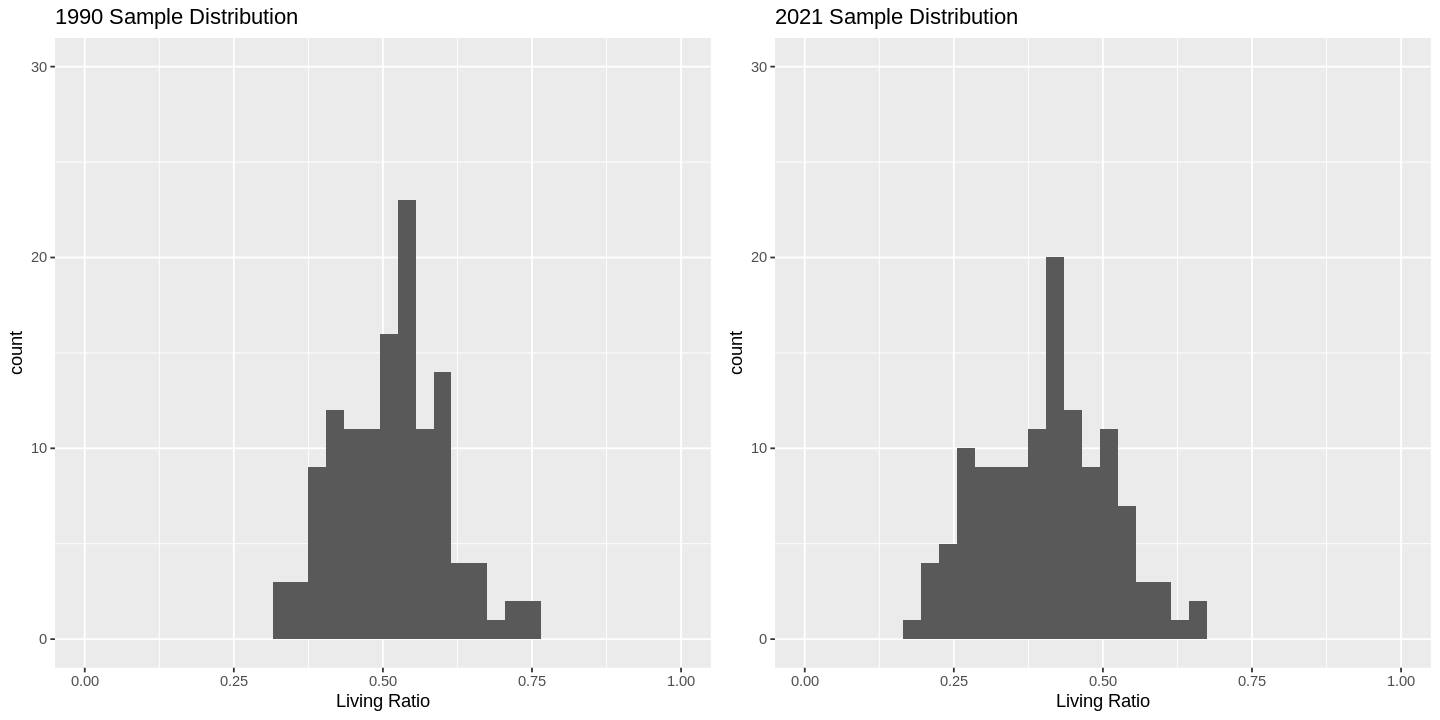

In [36]:
# Visualizaing 2021 Living Ratio via Histogram
sample_dist_2021 <- rentwage_clean %>%
    ggplot(aes(x = year2021)) +
    geom_histogram(binwidth = 0.03) +
    ggtitle("2021 Sample Distribution") +
    xlab("Living Ratio") +
    xlim(0, 1) +
    ylim(0, 30) 

# Visualizaing 1990 Living Ratio via Histogram
sample_dist_1990 <- rentwage_clean %>%
    ggplot(aes(x = year1990)) +
    geom_histogram(binwidth = 0.03) +
    ggtitle("1990 Sample Distribution") +
    xlab("Living Ratio") +
    xlim(0, 1) +
    ylim(0, 30)

# Displaying Plots Side by Side
options(repr.plot.width = 12, repr.plot.height = 6)
plots <- plot_grid(sample_dist_1990, sample_dist_2021)
plots

Computing Parameter Estimates: Living Ratio Means from 1990 and 2021

In [37]:
living_ratio_difference_estimates <- rentwage_clean %>%
    summarize(mean_ratio_difference = mean(ratio_diff),
              iqr_ratio_difference = IQR(ratio_diff))
living_ratio_difference_estimates

mean_ratio_difference,iqr_ratio_difference
<dbl>,<dbl>
-0.1081855,0.08174834


## Methods: Plan

Using minimum wage and average rent as the ratio quantities is reasonable and trustworthy, as being able to afford personal housing is a common measure for independence, and minimum wage is a way to quantify earning power. Differencing the ratios across years therefore reasonably quantifies change in independence hardships, with 0 representing no change, and positive values representing increased hardship.

The histograms generated provide preliminary insight into the differences in living ratios across Canadian cities, but do not provide a conclusive argument on how the ratios changed across the 31 years. Furthermore, without deeper inferential analysis, the significance of the ratio difference estimates is inconclusive.

Hypothesis testing will be conducted on this difference quantity; the null hypothesis claims there is no difference between the 1990 and 2021 living ratios. Testing will be conducted through bootstrapping and asymptotics methods, via resampling the data many times as well as using the Central Limit Theorem to approximate the null distribution. Since the data points from 1990 and 2021 are collected from the same cities, these two samples are not independent, and therefore a two-sample t-test cannot be used. Instead, a paired one-sample, two-sided t-test will be used, with each observation being a city, and the test statistic being the living ratio difference between 1990 and 2021. Confidence intervals will be similarly conducted using the previously mentioned methods to assess the significance in ratio differences.

We expect to find that the cost of financial independence has changed since 1990, due to the many historical, political, and economic progressions in the 31-year gap. Such findings could inspire deeper analysis to better understand future generations' needs and tailoring planning for economic and individual stability. Future analysis can include other variables influencing financial independence, or conducting a time series analysis involving yearly data, providing more insight to the dynamic changes in the past decades.    

## References

Cariaga, V. (2021, December 8). Over 60% of millennials and gen Z are 'constantly stressed' about money, survey finds. GOBankingRates. Retrieved March 5, 2022, from https://www.gobankingrates.com/money/financial-planning/over-60-of-millennials-and-gen-z-are-constantly-stressed-about-money-survey-finds/

Government of Canada. (2022, February 21). Average rents for areas with a population of 10,000 and over - dataset. Open Government Portal. Retrieved March 5, 2022, from https://open.canada.ca/data/en/dataset/1146388b-a150-4e70-98ec-eb40cb9083c8/resource/2be23210-9dd2-4511-840e-c467e0645827 

Government of Canada. (2016, December 6). Hourly minimum wages in Canada for adult workers. Hourly Minimum Wages in CANADA for Adult Workers - Canada.ca. Retrieved March 5, 2022, from http://srv116.services.gc.ca/dimt-wid/sm-mw/rpt2.aspx 

Lee, J. C., & Mortimer, J. T. (2009). Family Socialization, Economic Self-Efficacy, and the Attainment of Financial Independence in Early Adulthood. *Longitudinal and life course studies : international journal, 1*(1), 45–62.

Xiao, J. J., Chatterjee, S., &amp; Kim, J. (2014). Factors associated with financial independence of Young Adults. *International Journal of Consumer Studies, 38*(4), 394–403. https://doi.org/10.1111/ijcs.12106 
